In [1]:
%matplotlib inline
%load_ext autoreload
import skimage
from skimage import transform,exposure,morphology,feature
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import ndimage as ndi

In [2]:
#read in image and convert to float
gelimg=io.imread('data/Kirk Vander Meulen 2018-04-18_10h25m37s.tif')
revgsgelimg=skimage.color.rgb2gray(gelimg)
gsgelimg=1-revgsgelimg
fltimg_raw=skimage.img_as_float(gsgelimg)

In [3]:
#optimally rotate image
%autoreload 2
from gimage import get_optrotate,get_optrscutoff
rangle=get_optrotate(fltimg_raw)
print(f'rotating by {rangle}')
fltimg_raw_rotate=skimage.transform.rotate(fltimg_raw,rangle)

rotating by -1.0828084551086339


In [6]:
#optimally set lower threshold
%autoreload 2
from gimage import get_optrscutoff
lco=get_optrscutoff(fltimg_raw_rotate)
fltimg_raw_rotate_lco=skimage.exposure.rescale_intensity(fltimg_raw_rotate,in_range=(lco,1))

C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\morphology\greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\morphology\greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\morphology

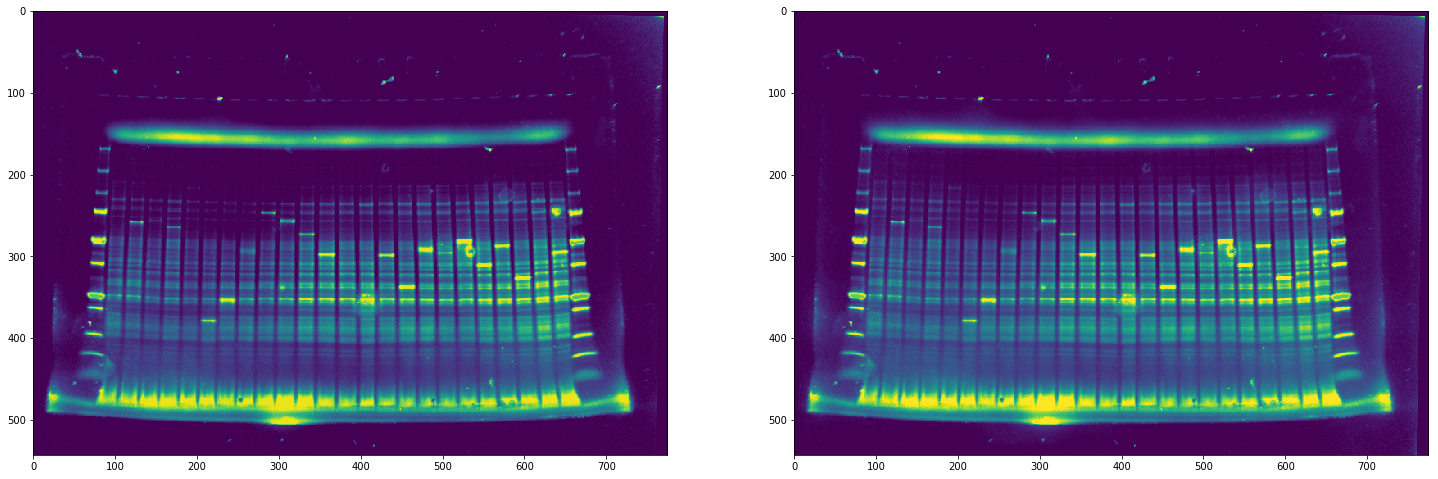

In [15]:
#seed = np.copy(fltimg_raw_rotate_lco)
#seed[1:-1, 1:-1] = fltimg_raw_rotate_lco.max()
#mask = fltimg_raw_rotate_lco.copy()
#
#filled = skimage.morphology.reconstruction(seed, mask, method='erosion')

seed = np.copy(fltimg_raw_rotate_lco)
seed[1:-1, 1:-1] = fltimg_raw_rotate_lco.min()
mask = fltimg_raw_rotate_lco.copy()

rec = skimage.morphology.reconstruction(seed, mask, method='dilation')


#filled=skimage.exposure.rescale_intensity(filled,in_range=(0.2,1))
fig,ax=plt.subplots(1,2,figsize=(25,10))

peakhlimg=fltimg_raw_rotate_lco-rec
ax[0].imshow(peakhlimg)
ax[1].imshow(fltimg_raw_rotate_lco)
#ax[1].imshow(fltimg_raw)
#plt.figure(figsize=(10,15))
#plt.imshow(fltimg_raw_rotate_lco)
#plt.imshow(filled)

C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\util\arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


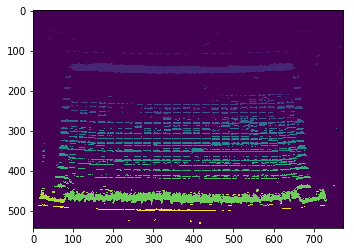

In [29]:
%autoreload 2
from gimage import get_gelbands
labeled_peaks=get_gelbands(peakhlimg)
    
#rps=skimage.measure.regionprops(labeled_peaks)
#plt.figure(figsize=(10,15))
#plt.imshow(labeled_peaks)
#for rp in rps:
#    plt.plot(rp.centroid[1],rp.centroid[0],'r.',ms=5)

In [372]:
%autoreload 2
from lanefinder import gel,gel_band,GelDG
mygel=gel(peakhlimg,labeled_peaks)
geldg=GelDG(mygel)

graph built, adding edges
added 100 nodes...
added 200 nodes...
added 300 nodes...
added 400 nodes...
final graph contains 409 nodes and 5691 edges


In [373]:
%autoreload 2
from lanefinder import GelDG
geldg.make_lane_clusters()
geldg.extend_lane_clusters()
geldg.merge_lane_clusters()

[8, 17, 14, 16, 18, 3, 19, 16, 19, 14, 12, 10, 16, 12, 15, 10, 6, 11, 15, 15, 10, 13, 19, 17, 10, 6, 3, 2, 3, 3, 3, 2, 2]
33


In [397]:
geldg.lane_clusters[0].gel.intensityimage

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

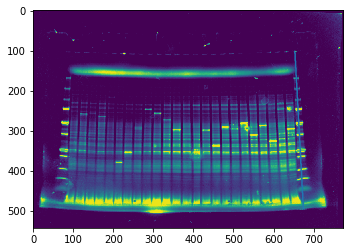

In [473]:
%autoreload 2
from lanefinder import define_lane_widths

plt.imshow(peakhlimg)

stuffs,bands=define_lane_widths(geldg.lane_clusters)
plt.plot(np.array(l0cseg)[:,1],np.array(l0cseg)[:,0])

In [ ]:
np.power()

In [498]:
lc0=geldg.lane_clusters[0]
it=list(lc0.gbs)[0].rp.inertia_tensor
ict=it[:,1]
print(np.linalg.norm(ict/np.linalg.norm(ict)))

0.9999999999999999


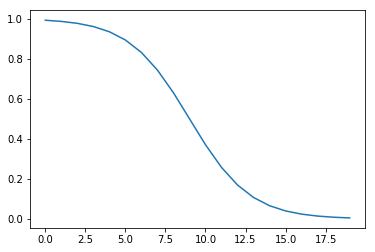

In [492]:
x=np.array(range(20))
#logistic=1-np.exp(x-10)/(1+np.exp(x-10))
logistic=1-np.power(1.7,x-9)/(1+np.power(1.7,x-9))

plt.plot(x,logistic)

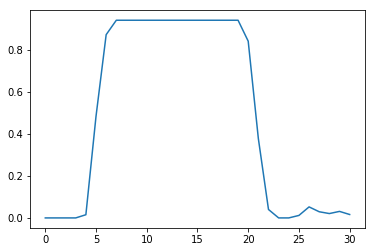

In [482]:
plt.plot(peakhlimg[247,69:100])

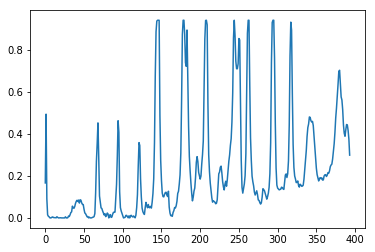

In [476]:
plt.plot(bands[0]);#[:,:]);
#plt.plot(stuffs[1][0][0][5:]);
#plt.plot(stuffs[2][0][0][5:]);
#plt.plot(stuffs[3][0][0][5:]);
#plt.plot(stuffs[4][0][0][5:]);
#plt.plot(stuffs[5][0][0][5:]);
#plt.plot(stuffs[6][0][0][5:]);
#plt.plot(stuffs[9][0][0][5:]);

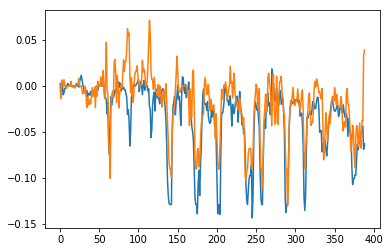

In [447]:
plt.plot(stuffs[0][0][0][5:]);
#plt.plot(stuffs[1][0][0][5:]);
#plt.plot(stuffs[2][0][0][5:]);
#plt.plot(stuffs[3][0][0][5:]);
#plt.plot(stuffs[4][0][0][5:]);
#plt.plot(stuffs[5][0][0][5:]);
#plt.plot(stuffs[6][0][0][5:]);
plt.plot(stuffs[9][0][0][5:]);

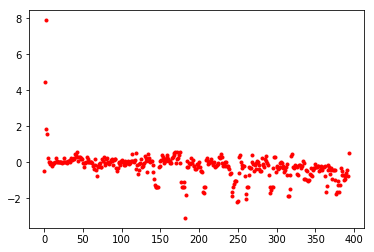

In [422]:
plt.plot(u[0]*s[0],'r.');

In [234]:
from operator import attrgetter
junk=geldg.lane_clusters
newjunk=sorted(junk,key=attrgetter('csize'))
for j in newjunk:print(len(j.gbs))

2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
6
6
6
6
8
8
10
10
10
10
10
10
10
10
11
11
12
12
12
12
13
13
14
14
14
14
15
15
15
15
15
15
16
16
16
16
16
16
17
17
17
17
18
18
19
19
19
19
19
19


In [200]:
mygel.sizegood_gelbands[3].rp.major_axis_length

14.321440929834326

In [ ]:
geldg.band_DG.

In [196]:
def getlcstats(lc):
    allcoords=[]
    centers=[]
    for gb in lc:
        centers.append(gb.rp.weighted_centroid)
        for coord in gb.rp.coords:
            allcoords.append(coord)
    allcoords=np.array(allcoords)
    centers=np.array(centers)
    
    row_max=max(allcoords[:,0])
    row_min=min(allcoords[:,0])
    col_max=max(allcoords[:,1])
    col_min=min(allcoords[:,1])
   # print(centers)
   # print(centers[:,0])
    xarray=np.array([np.array([x]) for x in centers[:,0]])
#    print(xarray)
#    print(xarray.shape)

    reg=LinearRegression().fit(X=xarray,y=centers[:,1].T)
    print(reg.coef_)
    print(reg.intercept_)
    rcpairs_centersegment=[[r,reg.intercept_+reg.coef_[0]*r] for r in range(543)]
    print(row_min,row_max)
    print(col_min,col_max)
    #print(row_max)
    #for gb in lc:
    #    print(type(gb.rp.coords[0]))
lcs=sorted(geldg.lane_clusters,key=len)
for lcpos in range(len(lcs)-1,-1,-1):
    curlc=lcs[lcpos]
    print(len(curlc))
    lcstats=getlcstats(curlc)

#sortedlc=lcs.sort(lcs,key=att)

19
[-0.01882936]
339.71570006049495
233 413
321 344
19
[0.02175404]
472.43593488053517
212 420
468 492
19
[0.02411785]
495.39198801740724
211 420
491 515
18
[0.04529279]
605.9609753323318
208 418
607 633
17
[0.00328112]
357.0546640387209
233 420
346 370
17
[0.03528192]
539.5061665357925
208 415
537 565
16
[-0.04051396]
136.5685491066358
228 415
112 136
16
[0.01770532]
449.8638426645678
212 414
444 468
16
[0.04363912]
583.4878826259778
208 382
585 612
15
[-0.02188827]
268.934584476884
233 418
248 272
15
[0.00531249]
381.31854750686296
232 415
371 395
15
[-0.03530791]
180.6561325468514
230 412
156 181
14
[0.0394684]
515.0548032076548
212 419
515 540
14
[0.03906431]
561.4661965573198
208 382
561 589
13
[-0.02122224]
316.0397595601307
233 413
298 321
12
[-0.04184128]
159.50048752458758
229 372
135 158
12
[0.01162829]
427.85052955142794
213 414
420 444
11
[-0.02656763]
246.13986928552347
232 412
225 248
10
[0.00705867]
405.0608596072418
233 321
397 417
10
[-0.04500135]
299.4220003981643
233

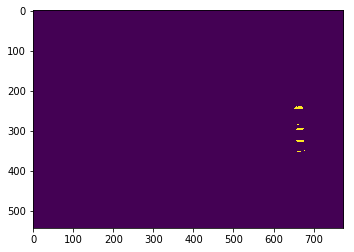

In [381]:
#now time to extend clusters:
laneclusterplot=np.zeros_like(peakhlimg)
for gb in geldg.lane_clusters[0].gbs:
    for rc in gb.rp.coords:
        laneclusterplot[rc[0],rc[1]]=1
#for gb in geldg.lane_clusters[25].gbs:
#    for rc in gb.rp.coords:
#        laneclusterplot[rc[0],rc[1]]=1
plt.imshow(laneclusterplot)

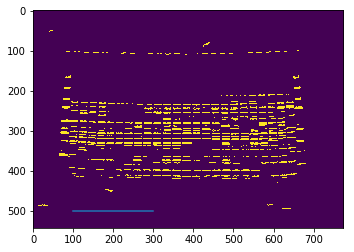

In [17]:
rps=skimage.measure.regionprops(labeled_peaks,intensity_image=peakhlimg,coordinates='rc')
#rps=skimage.measure.regionprops(labeled_peaks)

cros_=[]
bigis=[]
goodis=[]
junkregions=[]
smallis=[]
for rp in rps:#[:3]:#[6:32]:
    #print(rp.area,rp.inertia_tensor,rp.inertia_tensor_eigvals,rp.major_axis_length,rp.minor_axis_length)#rp.orientation,rp.solidity)
    cros_.append([rp.inertia_tensor[1,1],rp.inertia_tensor[0,0],rp.inertia_tensor[0,1]])
    if rp.inertia_tensor[1,1]>10 and rp.inertia_tensor[1,1]<50:
        bigis.append(rp)
    elif rp.inertia_tensor[1,1]<=10:
        smallis.append(rp)
    elif rp.inertia_tensor[1,1]>50:
        junkregions.append(rp)
for rp in bigis:
    if abs(rp.inertia_tensor[0,0]/rp.inertia_tensor[1,1])<0.2:
        goodis.append(rp)
bigimask=np.zeros_like(peakhlimg)
for rp in bigis:
    #print(rp.centroid)
    for rc in rp.coords:
        #print(rc)
        bigimask[rc[0],rc[1]]=1
plt.imshow(bigimask)
plt.plot([100,300],[500,500])


In [18]:
%autoreload 2
import networkx as nx
from lanefinder import gel_lane,gel_band,gel

DG=nx.DiGraph()
for rp in bigis:#[:350]:
    newgb=gel_band(rp,peakhlimg)
    DG.add_node(newgb)
print("graph built, adding edges")
for node1 in list(DG.nodes):
    for node2 in list(DG.nodes):
        if node1==node2:continue
        ol=node1.score_band_connection(node2)

        ndistance=np.sqrt( (node1.regionprops.weighted_centroid[0]-node2.regionprops.weighted_centroid[0])**2.
                           +(node1.regionprops.weighted_centroid[1]-node2.regionprops.weighted_centroid[1])**2.)
        if ol is not None:
            DG.add_edge(node1,node2,alignscore=ol,distance=ndistance)        

graph built, adding edges


In [19]:
def find_others(gb,lanebands):
    lanebands.add(gb)
    neighbors=set(DG.successors(gb)).intersection(DG.predecessors(gb))
    strong_neighbors=[n for n in neighbors if (DG[gb][n]['alignscore']>0.8 and DG[n][gb]['alignscore']>0.8) 
                      and DG[n][gb]['distance']<50 ]    
    for sn in strong_neighbors:
        if sn not in lanebands:
            lanebands=find_others(sn,lanebands)
    return lanebands
lanebands=[]
for band in list(DG.nodes):
    curbands=[]
    if True not in [band in x for x in lanebands]:
        curbands=find_others(band,set())
        #print(len(curbands))
    if len(curbands)>1:
        lanebands.append(curbands)
print([len(x) for x in lanebands])
print(len(lanebands))
#for ln in lanebands:
#    print(ln.regionprops.weighted_centroid)

[8, 17, 14, 16, 18, 3, 19, 16, 19, 14, 12, 10, 16, 12, 15, 10, 6, 11, 15, 15, 10, 13, 19, 17, 10, 6, 3, 2, 3, 3, 3, 2, 2]
33


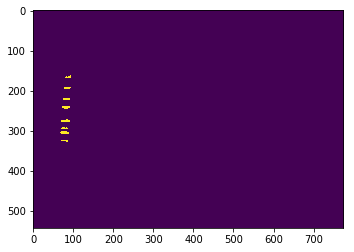

In [20]:
laneclusterplot=np.zeros_like(peakhlimg)
for gb in lanebands[0]:
    #print(rp.centroid)
    for rc in gb.regionprops.coords:
        #print(rc)
        laneclusterplot[rc[0],rc[1]]=1
plt.imshow(laneclusterplot)
#plt.plot([100,300],[500,500])

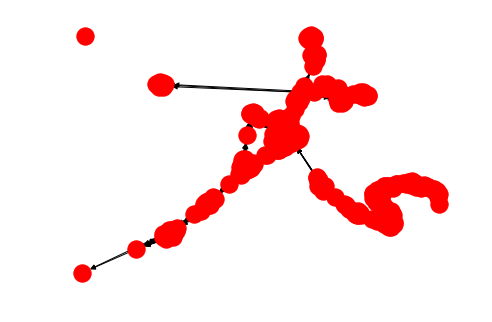

In [124]:
nx.draw(DG)#,nlist=[range(5,10),range(5)])

In [ ]:
random_neighbors=set(DG.successors(randomband)).intersection(DG.predecessors(randomband))
print(len(random_neighbors))
random_strong_neighbors=[n for n in random_neighbors if (DG[randomband][n]['alignscore']>0.9 and DG[randomband][n]['alignscore']>0.9) ]

In [144]:
randomband=list(DG.nodes)[111]
more=True
random_neighbors=set(DG.successors(randomband)).intersection(DG.predecessors(randomband))
print(len(random_neighbors))
random_strong_neighbors=[n for n in random_neighbors if (DG[randomband][n]['alignscore']>0.9 and DG[n][randomband]['alignscore']>0.9) ]
#print(len(random_strong_neighbors))
for x in random_strong_neighbors:
    print(x.regionprops.weighted_centroid)
#while(more):
#    rel

18
(332.98159166941116, 480.273814687895)
(346.2310801928064, 480.02810386743994)
(244.6504967901412, 477.2678540754884)
(321.2721494884842, 479.8704758615528)
(213.67889396520468, 477.77748751830967)
(234.89012778993845, 476.83245750836943)
(288.52592807112643, 479.0332275506207)
(307.7822785431543, 479.48641924285744)
(412.81301780431943, 479.7984044958764)
(314.55861705304494, 479.87591647082735)


In [146]:
def find_others(gb,lanebands):
    lanebands.add(gb)
    neighbors=set(DG.successors(gb)).intersection(DG.predecessors(gb))
    strong_neighbors=[n for n in neighbors if (DG[gb][n]['alignscore']>0.9 and DG[n][gb]['alignscore']>0.9) ]    
    for sn in strong_neighbors:
        if sn not in lanebands:
            lanebands=find_others(sn,lanebands)
    return lanebands
randomband=list(DG.nodes)[111]
#lanebands=set()
lanebands=find_others(randomband,set())
for ln in lanebands:
    print(ln.regionprops.weighted_centroid)
    

(332.98159166941116, 480.273814687895)
(346.2310801928064, 480.02810386743994)
(380.4144026695616, 481.5673656544935)
(266.50717667778264, 479.67472091402226)
(418.64326209084317, 481.213488012052)
(364.66529996973054, 480.35310218694565)
(374.179581162763, 480.74841949205563)
(321.2721494884842, 479.8704758615528)
(244.6504967901412, 477.2678540754884)
(398.1298244376871, 481.00688455641847)
(213.67889396520468, 477.77748751830967)
(256.2573561150288, 477.7090015232988)
(307.7822785431543, 479.48641924285744)
(234.89012778993845, 476.83245750836943)
(338.114324035246, 480.9338017315398)
(412.81301780431943, 479.7984044958764)
(271.78963394971873, 475.2287819270337)
(314.55861705304494, 479.87591647082735)
(288.52592807112643, 479.0332275506207)


In [92]:
nodex=DG.nodes[gbs[13]]
#tliter=DG.nodes_iter(data=True)
for n in DG.nodes():
    print(nodex.score_band_connection())
DG.neighbors()
DG.predecessors()
#while(tliter.next()):
#    print(nodex.score_band_connection())
#    print(DG.a)

AttributeError: 'dict' object has no attribute 'score_band_connection'

In [7]:
%autoreload 2
from gimage import get_gelregions
b=get_gelregions(fltimg_raw_rotate)
#for lp in b:

rps=skimage.measure.regionprops(b)
plt.figure(figsize=(10,15))
plt.imshow(b)
for rp in rps:
    plt.plot(rp.centroid[1],rp.centroid[0],'r.',ms=5)

C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\util\arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


NameError: name 'simple' is not defined

In [180]:
    el_map=skimage.filters.sobel_h(peakhlimg)
    el_map=skimage.img_as_float(el_map)/el_map.max()
    el_map=skimage.exposure.rescale_intensity(el_map,in_range=(0,0.1))
    markers=np.zeros_like(peakhlimg)
    markers[el_map>0.3]=2
    markers[el_map<0.1]=1
    seg=skimage.morphology.watershed(el_map,markers)
    peakseg=np.zeros_like(peakhlimg)
    peakseg[seg==2]=1
    peakseg=ndi.binary_fill_holes(peakseg)
    labeled_peaks,_=ndi.label(peakseg)#ndi.binary_fill_holes(h))
    #labeled_peaks=skimage.morphology.remove_small_objects(labeled_peaks,min_size=10)


C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\util\arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


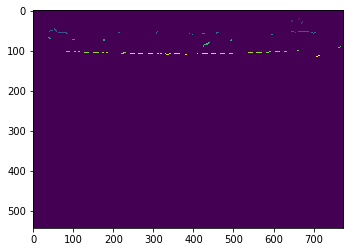

In [91]:
junk= labeled_peaks.copy()
junk[junk>200]=0
#junk[junk!=0]=1
plt.imshow(junk)

In [113]:
np.linalg.svd(np.array([[798,-12],[-12,0.53]]))

(array([[-0.99988686,  0.01504248],
        [ 0.01504248,  0.99988686]]),
 array([7.98180530e+02, 3.49469812e-01]),
 array([[-0.99988686,  0.01504248],
        [ 0.01504248,  0.99988686]]))

In [143]:
simple=np.array([[0,0,0],[1,1,1],[0,0,0]])
thing=skimage.measure.regionprops(simple,coordinates='rc')
thing[0].inertia_tensor

array([[ 0.        , -0.        ],
       [-0.        ,  0.66666667]])

In [173]:
b=np.array(cros_)
b[:,0]

array([798.64248874,   4.10666667,   2.53185596,   1.58448753,
       105.71301775,  19.66574839, 103.24049994,   5.66322314,
         1.93359375,   9.98224852,   4.47107438,   2.25      ,
         0.96      ,   4.20408163,   5.98765432,   1.86982249,
         2.0661157 ,   4.1664    ,   2.22222222,   1.74305556,
        27.02961433,   6.01331361,  11.20659722,  12.75862069,
        10.25      ,  13.10301769,  11.88137755,  17.40104167,
        16.1920439 ,  14.81726354,  16.43005885,  13.88888889,
        20.16      ,  11.        ,  15.22908093,  16.19555556,
        16.19555556,  10.49793388,  15.22908093,  15.53993056,
        18.28719723,  18.1144641 ,  16.25      ,   8.7475    ,
        12.01652893,  15.80555556,  16.74872449,  12.91666667,
         5.09      ])

[[ 5.33408014e-01 -1.24007095e+01]
 [-1.24007095e+01  7.98642489e+02]]
798.7387573013964
[1.         0.01552723]
0.0
(5.946859903381642, 720.9951690821256)
[-12.40070947 798.64248874]


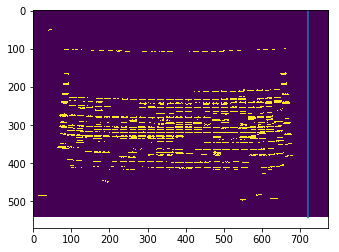

In [241]:
for rp in rps[1:2]:
    print(rp.inertia_tensor)
    icvector=rp.inertia_tensor[:,1]
    print(np.linalg.norm(icvector))
    #if c=1,d=
    dval=icvector[0]/(-icvector[1])
    orthog_vector=np.array([1,dval])
    print(orthog_vector)

    print(icvector@orthog_vector)
    center_point=rp.weighted_centroid
    center_point=rp.centroid
    rc_line=[center_point[1]+(x-center_point[0])*(orthog_vector[1]/orthog_vector[0]) for x in range(543)]
    print(center_point)
    #print()
    #print(icvector[0]/(-icvector[1]))
    #print(np.linalg.)
    print(icvector)
plt.imshow(bigimask)
plt.plot([rc_line[0],rc_line[1]],[0,543])

In [15]:
%autoreload 2
from lanefinder import gel_lane,gel_band,gel
#testrp=bigis[25]
#mygb=gel_band(testrp,peakhlimg)
mygel=gel(peakhlimg)
#mygel.assign_lane(mygb)
#newgb=gel_band(bigis[35],peakhlimg)
#mygel.assign_lane(newgb)
#newgb=gel_band(bigis[115],peakhlimg)
#mygel.assign_lane(newgb)
for rp in bigis[:100]:
    newgb=gel_band(rp,peakhlimg)
    mygel.assign_lane(newgb)
#glanes=gel_lanes()
#for rp in bigis[:40]:
#    curband=gel_band(rp)
#    for lane in glanes:
        

1
[1.2642411176571153] 1.2642411176571153 0
2.8355187855330026
2
[4.099759903190118, 4.40679645340889] 4.40679645340889 1
7.549351789160664
3
[9.445713465646335, 10.384870574693664, 10.366823116302651] 10.384870574693664 1
15.712776678758868
4
[18.241258914073086, 19.81253658194897, 20.426609682386513, 20.08347821538571] 20.426609682386513 2
28.2649505633749
5
[31.425553357517682, 33.62895158422213, 34.87514524348823, 35.164134335315985, 34.495918859705384] 35.164134335315985 3
46.14503055205618
6
[49.93775390502754, 52.77327269056055, 54.65158690865521, 55.572696559311524, 55.536601642529476, 54.543302158309075] 55.572696559311524 3
70.29217375385015
7
[74.71701766565013, 78.18465701001178, 80.69509178693502, 82.2483219964199, 82.84434763846643, 82.48316871307462, 81.16478522024445] 82.84434763846643 4
101.64553727780435
8
[106.70250174843291, 110.80226165162307, 113.94481698737486, 116.13016775568833, 117.35831395656344, 117.6292555900002, 116.94299265599864, 115.29952515455872] 117.

KeyboardInterrupt: 

In [238]:
peakhlimg.shape

(543, 775)

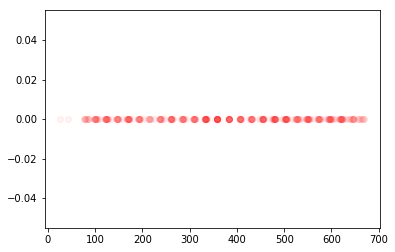

In [224]:
ccols=[]
for rp in goodis:
    ccols.append(rp.centroid[1])
plt.plot(ccols,np.zeros((len(ccols))),'ro',alpha=0.05)

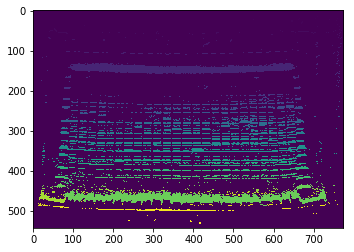

In [34]:
plt.imshow(labeled_peaks)

In [7]:
mjrmnrs=[(1+rp.major_axis_length)/(1+rp.minor_axis_length) for rp in rps]

C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\measure\_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\measure\_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


(array([616.,  20.,   5.,   2.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1.07767098, 10.92117357, 20.76467615, 30.60817874, 40.45168133,
        50.29518392, 60.1386865 , 69.98218909, 79.82569168, 89.66919427,
        99.51269685]),
 <a list of 10 Patch objects>)

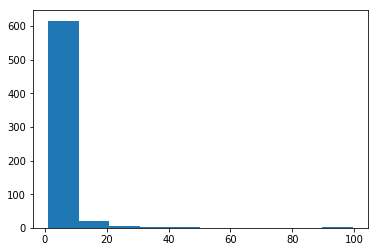

In [20]:
plt.hist(mjrmnrs)

In [26]:
goodrps_=[]
for rp in rps:
    mjrmnr_ratio=(1+rp.major_axis_length)/(1+rp.minor_axis_length)
    if mjrmnr_ratio<=20:
        goodrps_.append(rp)
    if mjrmnr_ratio>30:
        print(rp.centroid)
    #plt.plot(rp.major_axis_length/rp.minor_axis_length)

(3.956772334293948, 625.8876080691642)
(349.02915451895046, 486.9591836734694)
(385.0597701149425, 578.3425287356322)
(497.6363636363636, 315.68322399250235)


C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\measure\_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\measure\_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


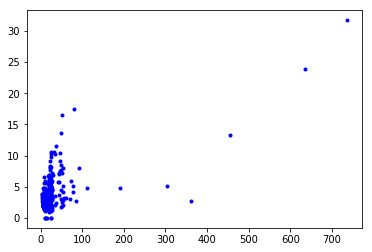

In [16]:
for rp in rps:
    plt.plot(rp.major_axis_length,rp.minor_axis_length,'b.')

C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\restoration\non_local_means.py:132: UserWarning: denoise_nl_means will default to multichannel=False in v0.15
  warn('denoise_nl_means will default to multichannel=False in v0.15')


0.004751906249790817 0.0014391378406547848


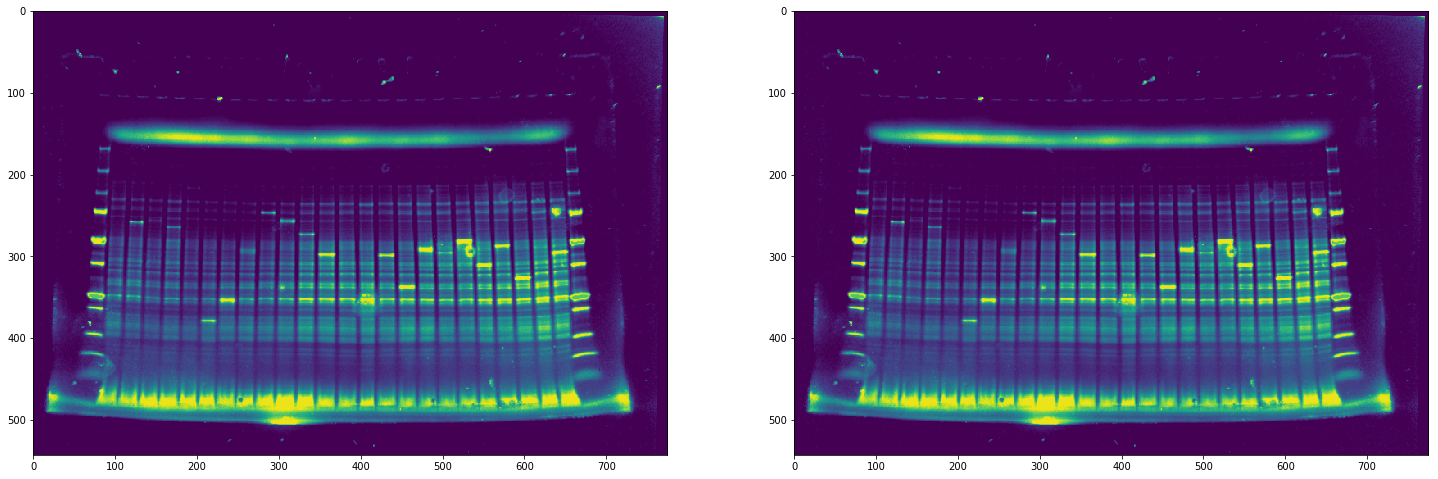

In [11]:
#newimg=skimage.restoration.denoise_tv_bregman(peakhlimg,weight=10,eps=.0001,max_iter=1000)
presigma=skimage.restoration.estimate_sigma(peakhlimg)
newimg=skimage.restoration.denoise_nl_means(peakhlimg,h=presigma/5,sigma=presigma,patch_distance=50)
postsigma=skimage.restoration.estimate_sigma(newimg)

print(presigma,postsigma)
fig,ax=plt.subplots(1,2,figsize=(25,10))
ax[0].imshow(newimg)
ax[1].imshow(peakhlimg)

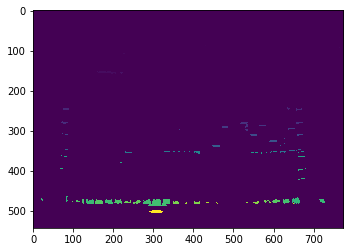

In [93]:
c=b[2]
c[b[2]!=0]=1
d=c.copy()
#d[b[1]==1]=2
plt.imshow(b[0])
#b=skimage.segmentation.find_boundaries()

In [216]:
seed = np.copy(newimg)
seed[1:-1, 1:-1] = newimg.max()
mask = newimg.copy()

filled = skimage.morphology.reconstruction(seed, mask, method='erosion')

filled2=skimage.morphology.reconstruction(e,mask, method='erosion')

seed = np.copy(newimg)
seed[1:-1, 1:-1] = newimg.min()
mask = newimg.copy()

rec = skimage.morphology.reconstruction(seed, mask, method='dilation')
rec2=skimage.morphology.reconstruction(ndi.maximum_filter(newimg,size=5),newimg, method='erosion')

#rec2=skimage.morphology.reconstruction(ndi.maximum_filter(newimg,size=3),rec2, method='erosion')
#rec2=skimage.morphology.reconstruction(ndi.maximum_filter(newimg,size=3),rec2, method='erosion')


#filled=skimage.exposure.rescale_intensity(filled,in_range=(0.2,1))
fig,ax=plt.subplots(1,2,figsize=(25,10))

dubrecon=newimg-rec
b=skimage.filters.threshold_li(filled2)
print(b)
ax[0].imshow(rec2-newimg)
ax[1].imshow(newimg)

C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\morphology\greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\morphology\greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\morphology

ValueError: Intensity of seed image must be greater than that of the mask image for reconstruction by erosion.

In [215]:
e=skimage.filters.sobel(newimg)
e=e*20
test = np.zeros_like(newimg)
test[newimg < 0.6] = 1
test[newimg > 0.7] = 2


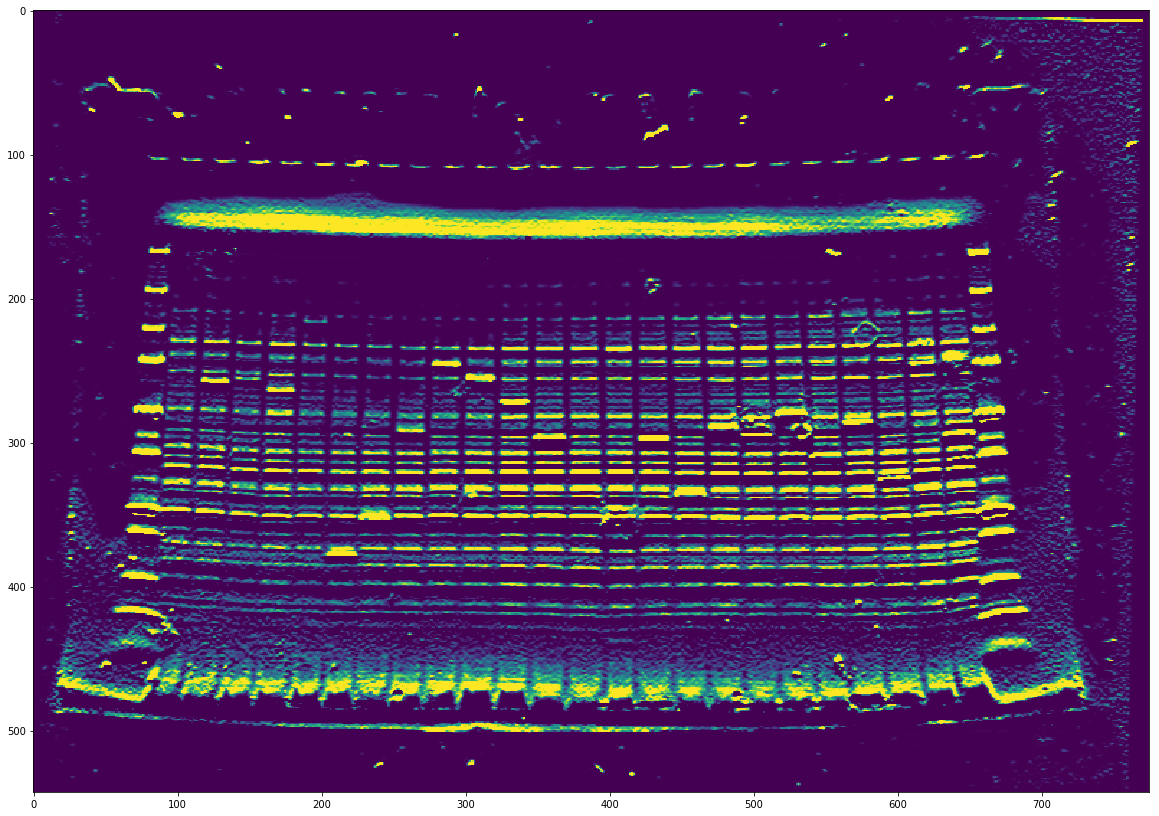

In [403]:
e=skimage.filters.sobel_h(newimg)
el_mappy=skimage.img_as_float(e)/e.max()
plt.figure(figsize=(20,30))
el_mappy2=skimage.exposure.rescale_intensity(el_mappy,in_range=(0,0.1))
plt.imshow(el_mappy2)

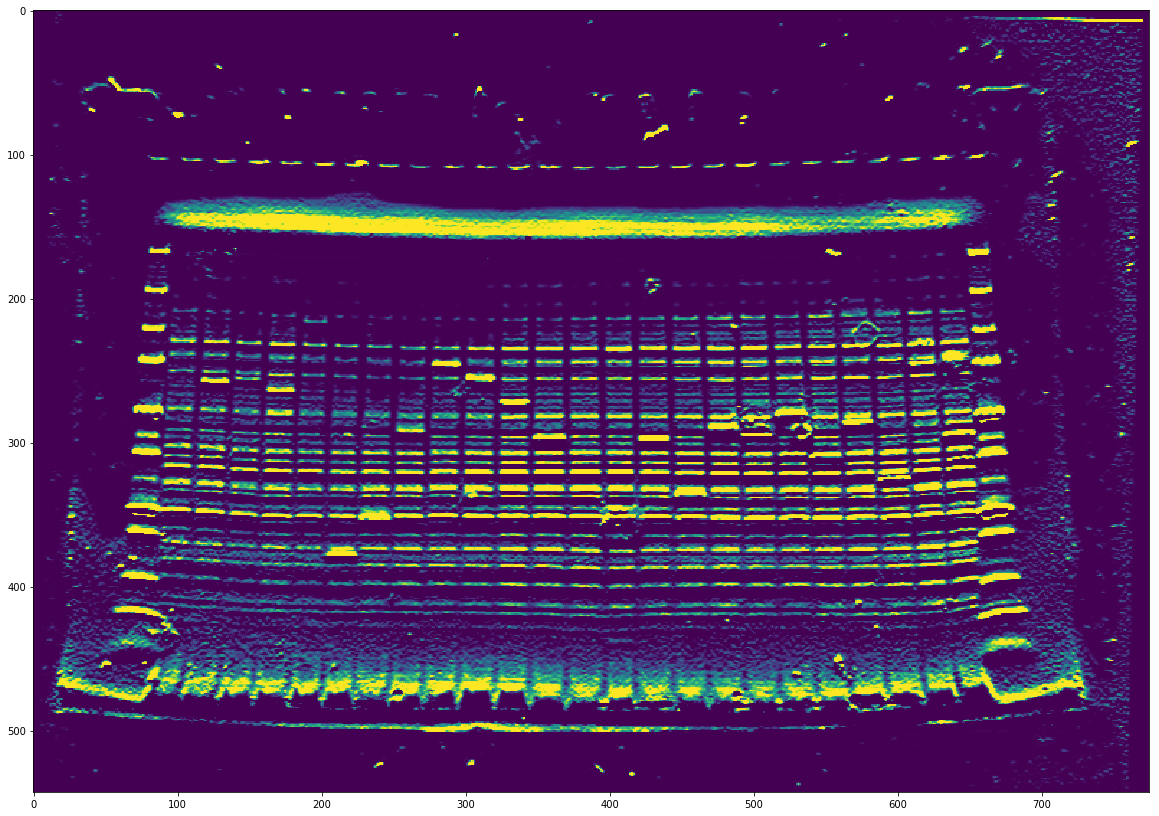

In [244]:
newimg.max()

0.9711861065872568

In [245]:
el_mappy.max()

1.0

In [247]:
j.max(),j.min()

(1.9414539673967144, 0.12465514500430197)

1.0 0.0


C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\util\arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


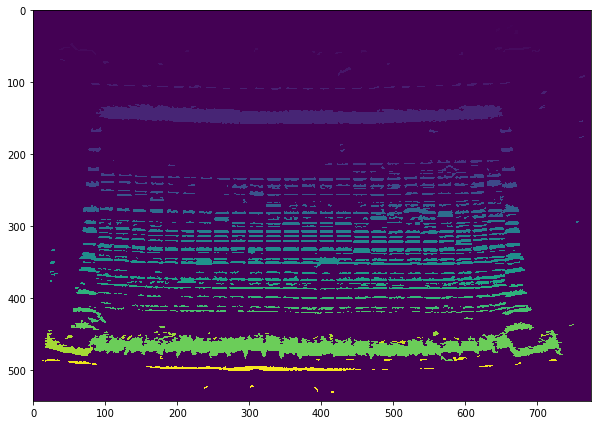

In [406]:
#cool=skimage.restoration.denoise_bilateral(newimg,multichannel=False,sigma_spatial=5)

markers=np.zeros_like(newimg)
markers[el_mappy2>0.3]=2
markers[el_mappy2<0.1]=1
seg=skimage.morphology.watershed(el_mappy2,markers)
tempseg=np.zeros_like(newimg)
tempseg[seg==2]=1
print(tempseg.max(),tempseg.min())
tempseg=ndi.binary_fill_holes(tempseg)
labeled_peaks,_=ndi.label(tempseg)#ndi.binary_fill_holes(h))
labeled_peaks=skimage.morphology.remove_small_objects(labeled_peaks,min_size=10)
plt.figure(figsize=(10,15))
plt.imshow(labeled_peaks)

C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\util\arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


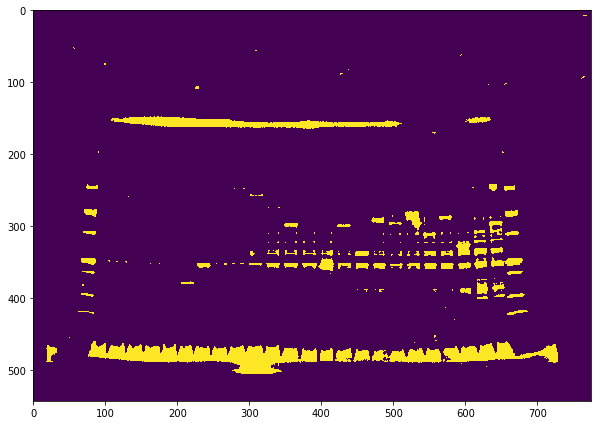

In [321]:
j=el_mappy+newimg
#j=j/j.max()
plt.figure(figsize=(10,15))
elmappy2= skimage.exposure.rescale_intensity(e, in_range=(0.0,5.0))
j=elmappy2*3+newimg
j=j/j.max()
#j=newimg.copy()
#j[elmappy2==1]=0

#plt.imshow(j)
markers=np.zeros_like(newimg)
markers[newimg>0.6]=2
markers[newimg<0.1]=1
h=skimage.morphology.watershed(newimg,markers)
plt.imshow(h)
#test2=np.zeros_like(newimg)
#test2[newimg>0.9]=2


C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\util\arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


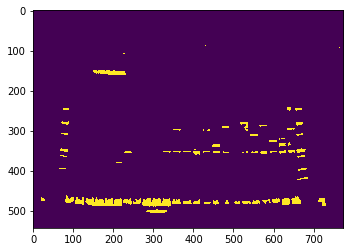

In [296]:
e=skimage.filters.sobel(newimg)
test2=np.zeros_like(newimg)
test2[newimg>0.9]=2

test2[newimg<=0.7]=1
d=skimage.morphology.watershed(e,test2)
plt.imshow(d)

0.09873181341147394


C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\filters\thresholding.py:221: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\filters\thresholding.py:223: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '


<Figure size 720x1080 with 0 Axes>

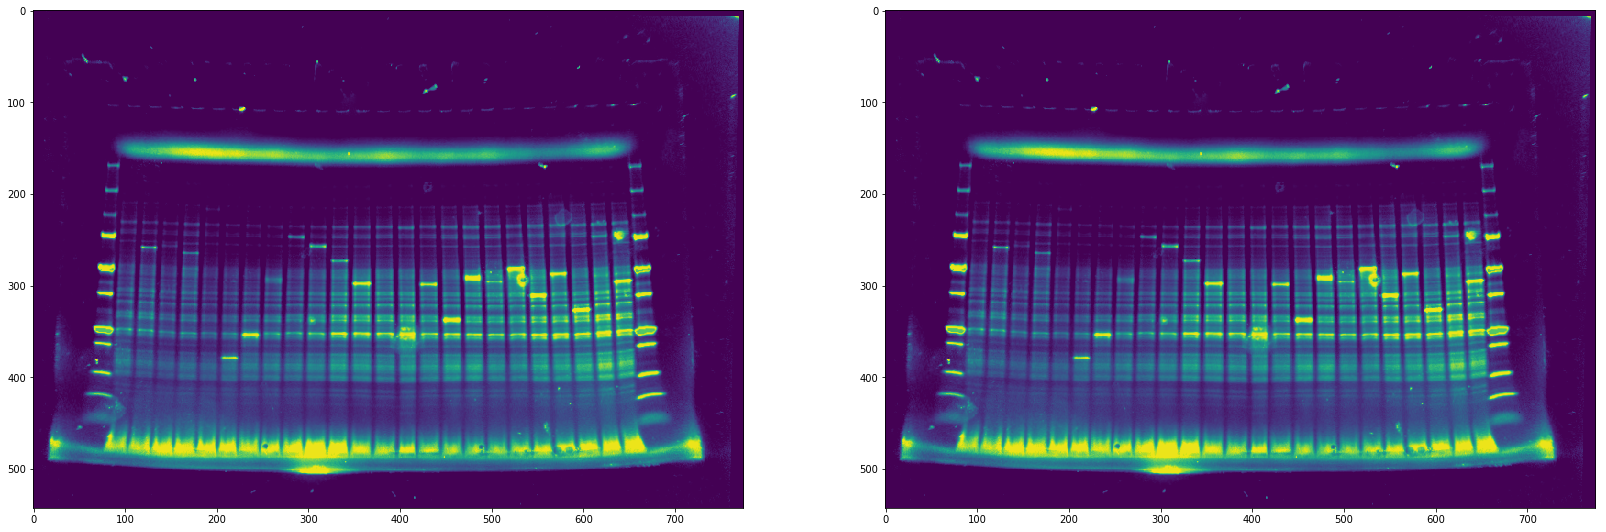

In [199]:
from skimage.filters import try_all_threshold
#fig, ax = try_all_threshold(newimg, figsize=(10, 8), verbose=False)
#plt.show()
plt.figure(figsize=(10,15))
fig,ax=plt.subplots(1,2,figsize=(28,15))
#b=skimage.filters.threshold_local(newimg,block_size=5,method='median')
#b=ndi.minimum_filter1d(newimg,axis=0,size=3)
#b=ndi.median_filter(newimg,footprint=[[1,1,1,1,1,1,1]])
#=ndi.median_filter(newimg,footprint=[[0,1,0],[0,1,0],[0,1,0],[0,1,0],[0,1,0],[0,1,0]])
b=skimage.filters.threshold_local(newimg,15)
#b=skimage.filters.threshold_li(newimg)
print(b)
skimage.feature.peak_local_max()
ax[0].imshow(newimg-b)
ax[1].imshow(newimg)

(543, 775)
<class 'numpy.ndarray'>
hi
[[ 88 429]]
hi
[[ 93 763]]
hi
[[106 229]
 [106 230]
 [107 227]
 [107 228]
 [107 229]
 [108 225]
 [108 226]
 [108 227]
 [108 228]
 [108 229]
 [109 226]]
hi
[[152 171]
 [152 172]
 [152 173]
 [152 174]
 [152 178]
 [152 179]
 [152 180]
 [152 181]
 [152 182]
 [152 184]
 [152 187]
 [153 165]
 [153 166]
 [153 167]
 [153 168]
 [153 170]
 [153 171]
 [153 172]
 [153 173]
 [153 174]
 [153 175]
 [153 176]
 [153 177]
 [153 178]
 [153 179]
 [153 180]
 [153 181]
 [153 182]
 [153 184]
 [153 185]
 [153 186]
 [153 187]
 [153 188]
 [153 189]
 [153 190]
 [153 191]
 [153 192]
 [153 193]
 [153 197]
 [153 199]
 [154 165]
 [154 166]
 [154 167]
 [154 168]
 [154 169]
 [154 170]
 [154 171]
 [154 172]
 [154 173]
 [154 174]
 [154 175]
 [154 176]
 [154 177]
 [154 178]
 [154 179]
 [154 180]
 [154 181]
 [154 182]
 [154 183]
 [154 184]
 [154 185]
 [154 186]
 [154 187]
 [154 188]
 [154 189]
 [154 190]
 [154 191]
 [154 192]
 [154 193]
 [154 194]
 [154 195]
 [154 196]
 [154 197]
 [15

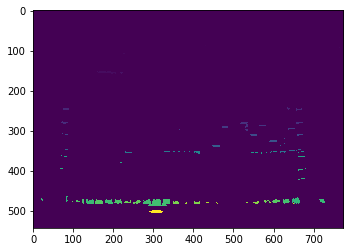

In [11]:
print(b[0].shape)
print(type(b[0]))
mergelabels=skimage.measure.regionprops(b[0])#skimage.img_as_uint(b[0],force_copy=True))
for rp in mergelabels:
    print('hi')
    print(rp.coords)
plt.imshow(b[0])

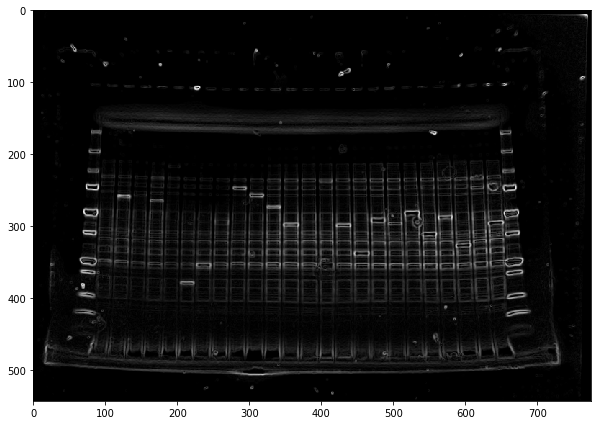

In [111]:
el_map=skimage.filters.sobel(newimg)
#el_map=skimage.filters.prewitt(newimg)

plt.figure(figsize=(10,15))
plt.imshow(el_map,cmap="gray")

In [ ]:
ndi.binary_fill_holes()

C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\util\arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


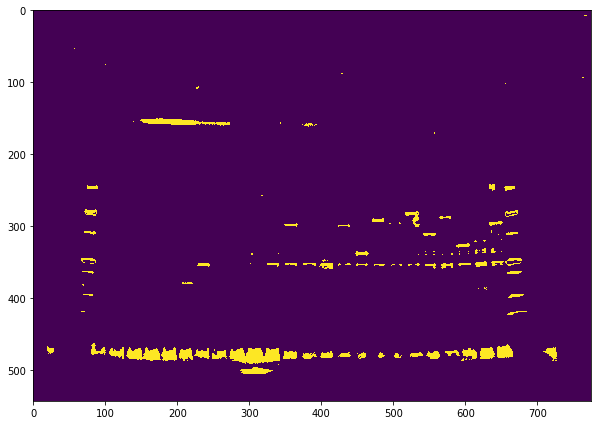

In [267]:
markers=np.zeros_like(newimg)
markers[newimg<0.1]=1
markers[newimg>.1]=2
markers[newimg>.2]=3
markers[newimg>.3]=4
markers[newimg>.4]=5
markers[newimg>.5]=6
markers[newimg>.6]=7
markers[newimg>.7]=8
markers[newimg>.8]=9
markers[newimg>.9]=10


seg=skimage.morphology.watershed(el_map,markers)#,compactness=1)
newseg=np.zeros_like(seg)
newseg[seg==10]=1
newseg[seg==9]=1
#newseg[seg==8]=1
#newseg[seg==7]=1
#newseg[seg==6]=1
#newseg[seg==5]=1
#newseg[seg==4]=1
#newseg[seg==3]=1
#newseg[seg==2]=1
#newseg[seg==1]=1
#newseg[seg==6]=1

plt.figure(figsize=(10,15))
plt.imshow(newseg)
#plt.imshow(el_map)

In [317]:
5.0%1

0.0

(543, 775)
<class 'numpy.ndarray'>
hi
[[ 88 429]]
hi
[[ 93 763]]
hi
[[106 229]
 [106 230]
 [107 227]
 [107 228]
 [107 229]
 [108 225]
 [108 226]
 [108 227]
 [108 228]
 [108 229]
 [109 226]]
hi
[[152 171]
 [152 172]
 [152 173]
 [152 174]
 [152 178]
 [152 179]
 [152 180]
 [152 181]
 [152 182]
 [152 184]
 [152 187]
 [153 165]
 [153 166]
 [153 167]
 [153 168]
 [153 170]
 [153 171]
 [153 172]
 [153 173]
 [153 174]
 [153 175]
 [153 176]
 [153 177]
 [153 178]
 [153 179]
 [153 180]
 [153 181]
 [153 182]
 [153 184]
 [153 185]
 [153 186]
 [153 187]
 [153 188]
 [153 189]
 [153 190]
 [153 191]
 [153 192]
 [153 193]
 [153 197]
 [153 199]
 [154 165]
 [154 166]
 [154 167]
 [154 168]
 [154 169]
 [154 170]
 [154 171]
 [154 172]
 [154 173]
 [154 174]
 [154 175]
 [154 176]
 [154 177]
 [154 178]
 [154 179]
 [154 180]
 [154 181]
 [154 182]
 [154 183]
 [154 184]
 [154 185]
 [154 186]
 [154 187]
 [154 188]
 [154 189]
 [154 190]
 [154 191]
 [154 192]
 [154 193]
 [154 194]
 [154 195]
 [154 196]
 [154 197]
 [15

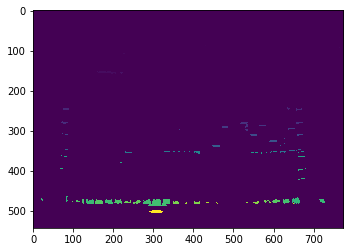

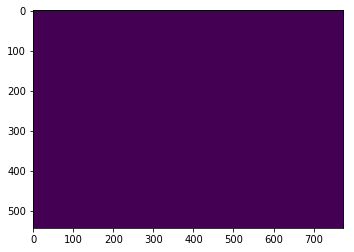

In [336]:
a=np.zeros_like(b[0])
a[b[0]!=0]=1
plt.imshow(a)

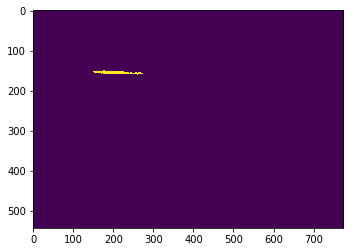

In [312]:
plt.imshow(b[1])

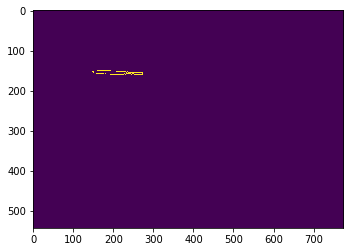

In [313]:
plt.imshow(b[2])

In [248]:
def peakcheck(rprops,labeled_peaks):
    if rprops.bbox_area<100:
        return False
    return True

In [249]:
prevseg=np.zeros_like(seg)
curseg=np.zeros_like(seg)
curlabeled_peaks=np.zeros_like(seg)
prevlabeled_peaks=np.zeros_like(seg)
curpk_props=[]

tempseg[seg==10]=1
labeled_peaks,_=ndi.label(ndi.binary_fill_holes(tempseg))
prevpk_props=skimage.measure.regionprops(labeled_peaks)
for pkprop in prevpk_props:
    acceptpeak=peakcheck(pkprop,labeled_peaks)
    if not acceptpeak:
        for coord in pkprop.coords:
            labeled_peaks[coord[0],coord[1]]=0
prevpk_props=skimage.measure.regionprops(labeled_peaks)
print(len(prevpk_props))
for mrkrval in range(9,1,-1):
    curseg=np.zeros_like(seg)
    curseg[seg==mrkrval]=1
    curseg=ndi.binary_fill_holes(curseg)

    curlabeled_peaks,_=ndi.label(curseg)
    curpk_props=skimage.measure.regionprops(curlabeled_peaks)
    for curpk_prop in curpk_props:
        curbbox=curpk_prop.bbox
        insides=[]
        for prevpk_prop in prevpk_props:
            prevbbox=prevpk_prop.bbox
            insidepoints=0
            if curbbox[0]>prevbbox[0]:insidepoints+=1
            if curbbox[1]>prevbbox[1]:insidepoints+=1
            if curbbox[2]<prevbbox[2]:insidepoints+=1
            if curbbox[3]<prevbbox[3]:insidepoints+=1
            if insidepoints>=4:
                insides.append(prevpk_prop.label)
        if len(insides)>0:
            if len(insides)>1:
                print(f'skipping at {newcoord[0]},{newcoord[1]}')
            else:
                for newcoord in curpk_prop.coords:
                    labeled_peaks[newcoord[0],newcoord[1]]=insides[0]
        #elif len(connecteds)>0:
        #    print('hi')
            

54
skipping at 472,184
skipping at 473,150
skipping at 472,329
skipping at 474,131
skipping at 474,187
skipping at 474,187
skipping at 476,595
skipping at 484,137
skipping at 479,322
skipping at 480,655
skipping at 470,664
skipping at 474,126
skipping at 480,320
skipping at 473,590
skipping at 473,590
skipping at 473,590
skipping at 478,248
skipping at 477,202
skipping at 471,130
skipping at 473,248
skipping at 477,223
skipping at 478,200
skipping at 477,254
skipping at 476,254
skipping at 471,223


In [252]:
plt.figure(figsize=(10,15))
tpeaks=(np.zeros_like(labeled_peaks))
tpeaks[labeled_peaks>0]=1
plt.imshow(labeled_peaks)

AttributeError: 'numpy.ndarray' object has no attribute 'label'

<Figure size 720x1080 with 0 Axes>

(543, 775)


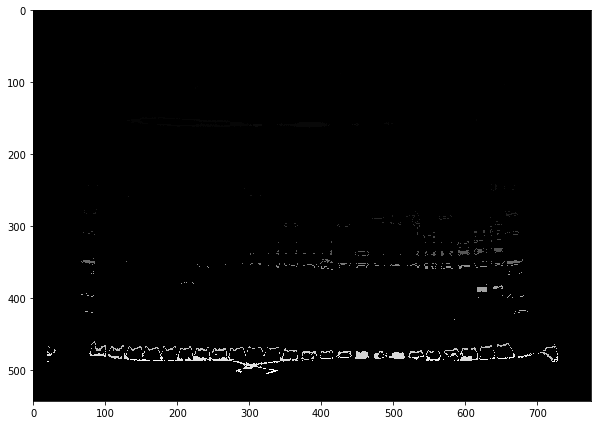

In [191]:
tempseg=np.zeros_like(seg)
tempseg[seg==8]=1
#tempseg[seg==9]=1
#tempseg[seg==8]=1
#tempseg[seg==7]=1
#tempseg[seg==6]=1
#tempseg[seg==5]=1
#tempseg[seg==4]=1
#tempseg[seg==3]=1
#tempseg[seg==2]=1


seg2=ndi.binary_fill_holes(tempseg)
labeled_peaks,_=ndi.label(seg2)
plt.figure(figsize=(10,15))
print(labeled_peaks.shape)
plt.imshow(labeled_peaks,cmap='gray');

In [152]:
b=skimage.measure.regionprops(labeled_peaks)

In [296]:
b[0].bbox_area

8

C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\restoration\non_local_means.py:132: UserWarning: denoise_nl_means will default to multichannel=False in v0.15
  warn('denoise_nl_means will default to multichannel=False in v0.15')


0.005826940746193211 0.002866219226034749


C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\morphology\greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\morphology\greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\morphology

0.003921574824352792


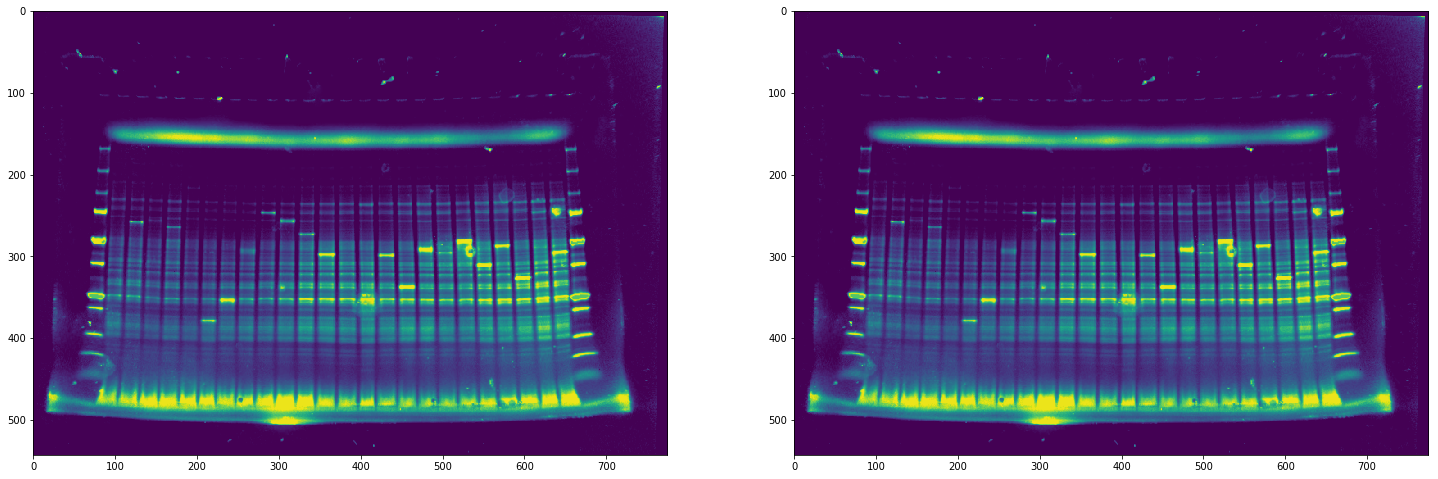

In [10]:
#here's if we reverse order...
presigma=skimage.restoration.estimate_sigma(fltimg_raw_rotate_lco)
dnimg=skimage.restoration.denoise_nl_means(fltimg_raw_rotate_lco,h=presigma/5,sigma=presigma,patch_distance=50)
postsigma=skimage.restoration.estimate_sigma(dnimg)

print(presigma,postsigma)
seed = np.copy(dnimg)
seed[1:-1, 1:-1] = dnimg.min()
mask = dnimg.copy()
rec = skimage.morphology.reconstruction(seed, mask, method='dilation')

dnpkhlimg=dnimg-rec
print(skimage.restoration.estimate_sigma(dnpkhlimg))

fig,ax=plt.subplots(1,2,figsize=(25,10))
ax[0].imshow(dnpkhlimg)
ax[1].imshow(newimg)

988


C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\util\arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


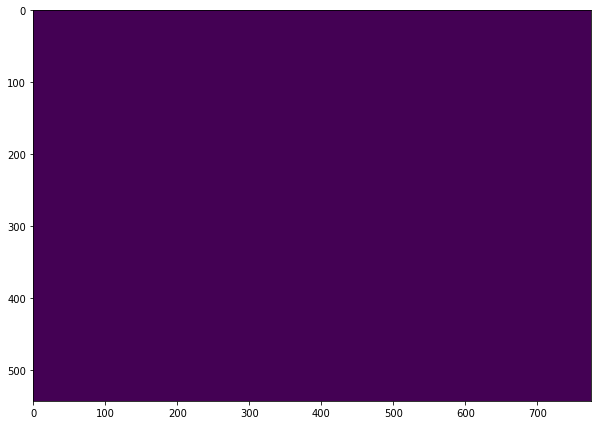

In [87]:
pks=skimage.feature.peak_local_max(newimg,min_distance=40,threshold_rel=.1)#,sigma_ratio=3)
print(len(pks))
pkimg=np.zeros_like(newimg)
for pk in pks:
    pkimg[pk[0],pk[1]]=1
super=skimage.segmentation.watershed(newimg,pkimg,connectivity=2)
plt.figure(figsize=(10,15))
plt.imshow(super)
#plt.imshow(c)
#plt.plot(pks[:,1],pks[:,0],'r.',ms=5)

In [84]:
pkimg

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

1460
2


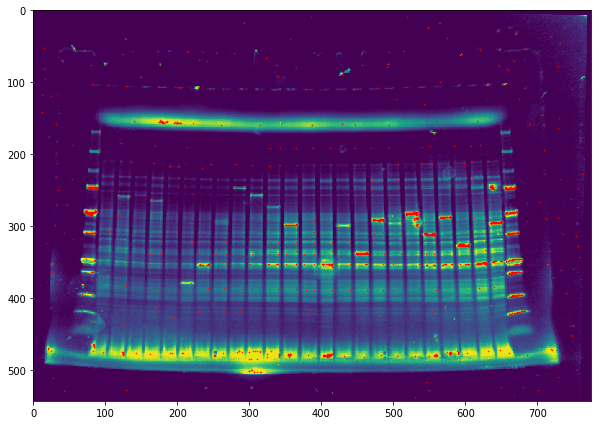

In [62]:
plt.figure(figsize=(10,15))
fplus=ndi.maximum_filter(newimg,size=5)
plt.imshow(newimg)
pf2=skimage.feature.peak_local_max(newimg,min_distance=10,threshold_rel=0.01)
print(len(pf2))
print(max([len(x) for x in pf2]))
plt.plot(pf2[:,1],pf2[:,0],'r.',ms=1)

C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\morphology\greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\morphology\greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
C:\Users\kavandermeul\AppData\Local\Continuum\anaconda3\envs\garmadon\lib\site-packages\skimage\morphology

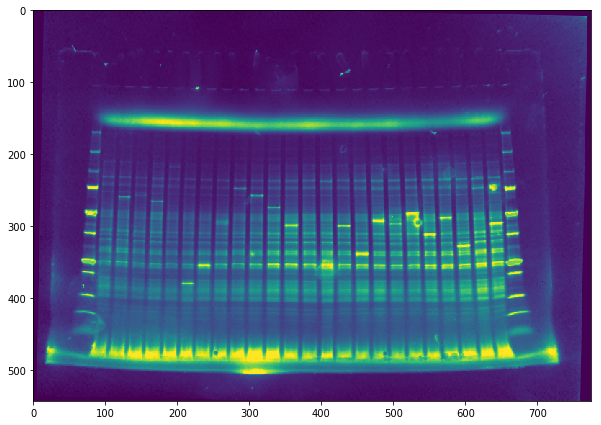

In [63]:
myimg=fltimg_raw_rotate.copy()
#super2=ndi.maximum_filter(stimage,size=2)

#seed=skimage.exposure.rescale_intensity(myimg,out_range=(0,.95))
#mask=ndi.maximum_filter(myimg,size=2)
#rec = skimage.morphology.reconstruction(seed, mask, method='dilation')

seed=myimg.copy()
mask=ndi.minimum_filter(myimg,size=2)
rec = skimage.morphology.reconstruction(seed, mask, method='erosion')
#seed[1:-1, 1:-1] = super2.max()
#mask = super2

#
#seed = np.copy(super2)
#seed[1:-1, 1:-1] = super2.min()
#rec = reconstruction(seed, mask, method='dilation')
plt.figure(figsize=(10,15))
plt.imshow(rec)

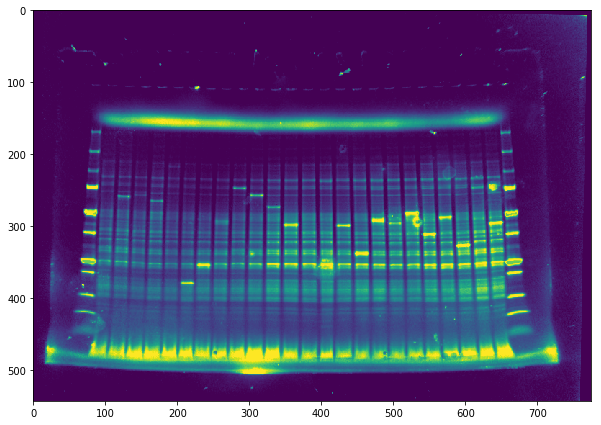

In [49]:
plt.figure(figsize=(10,15))
plt.imshow(fltimg_raw_rotate_lco)

In [32]:

U,s,Vh=np.linalg.svd(fltimg_raw_rotate,full_matrices=False)
start_energy=np.sum([np.linalg.norm(U@np.diag(s)[:,x]) for x in range(len(s))])
lower_range=1
relenergy=1
while(relenergy>0.99):
    lower_range-=0.01
    stimg = skimage.exposure.rescale_intensity(fltimg_raw_rotate, in_range=(0,lower_range))
    U,s,Vh=np.linalg.svd(stimg,full_matrices=False)
    new_energy=np.sum([np.linalg.norm(U@np.diag(s)[:,x]) for x in range(len(s))])
    print(new_energy,start_energy)
    relenergy=new_energy/start_energy
print(lower_range)

661.0768117861189 655.2541740984575
666.8223215946934 655.2541740984575
672.5703758099446 655.2541740984575
678.3181956215235 655.2541740984575
684.0629126841244 655.2541740984575
689.8365164376277 655.2541740984575
695.6644203140427 655.2541740984575
701.5405687794854 655.2541740984575
707.4722926012615 655.2541740984575
713.4351288054849 655.2541740984575
719.4409140436361 655.2541740984575
725.5134700489843 655.2541740984575
731.6311935131772 655.2541740984575
737.7983358707824 655.2541740984575
744.0141036398089 655.2541740984575
750.3063669477666 655.2541740984575
756.6274373098432 655.2541740984575
763.0187390939474 655.2541740984575
769.4369797796229 655.2541740984575
775.8939954618302 655.2541740984575
782.4402916753144 655.2541740984575
789.0322939671145 655.2541740984575
795.6734379558488 655.2541740984575
802.4254249122775 655.2541740984575
809.2515972679554 655.2541740984575
816.1419914856232 655.2541740984575
823.0655494888679 655.2541740984575


KeyboardInterrupt: 

In [39]:
newimg=skimage.exposure.rescale_intensity(fltimg_raw_rotate,in_range=(0,.7))

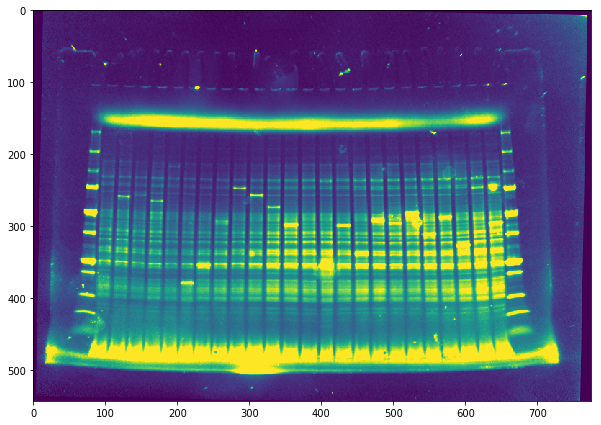

In [40]:
plt.figure(figsize=(10,15))
plt.imshow(newimg)

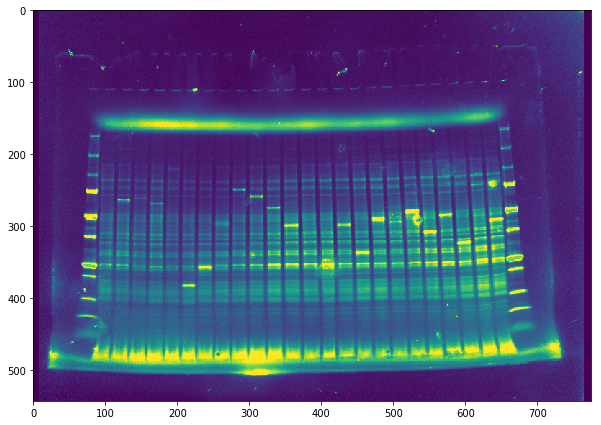

In [27]:
plt.figure(figsize=(10,15))
plt.imshow(fltimg_raw)

(-0.1, 0.1)

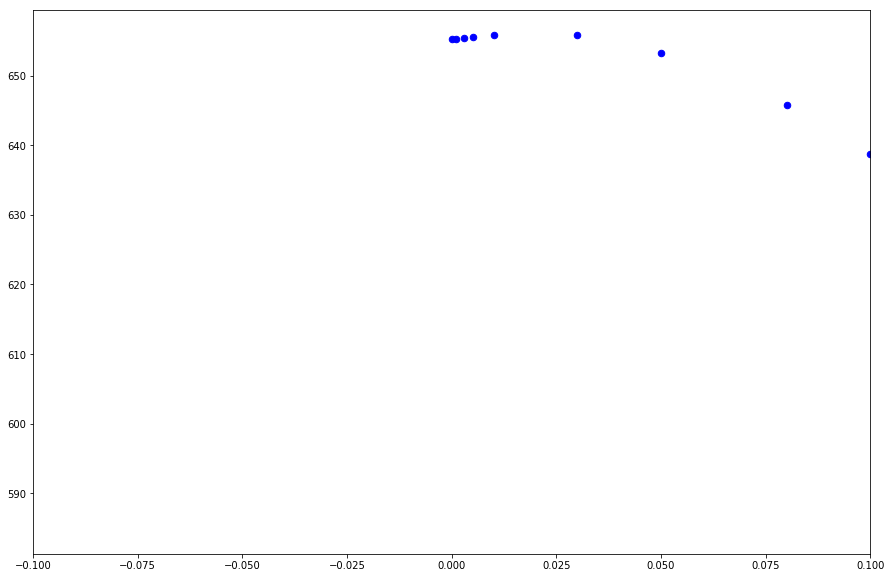

In [19]:
#conts_full=[np.linalg.norm(U@np.diag(s)[:,x]) for x in range(100)]
mcontsums=[]
mcontcuts=[]
for val in [0,.001,.003,.005,.01,.03,.05,.08,.1,.11,.12,.14,.17,.2,.25,.3,.35]:
#for val in [-20,-15,-10,-8,-6,-4,-2,-1.5,-1,-.5,0,.5,1,1.5,2,4,6,8,10]:#,15,20,30,45,60,75,88,89,90,91,92,105,120,125,140,155]:
#for val in [-20,-10,-1,1,10,20]:#,-8,-6,-4,-2,-1.5,-1,-.5,0,.5,1,1.5,2,4,6,8,10]:#,15,20,30,45,60,75,88,89,90,91,92,105,120,125,140,155]:
#for val in [-2.5,-2,-1.5,-1,-.5,.5,1,1.5]:
    #val=np.power(lval,10)
    stimg = skimage.exposure.rescale_intensity(fltimg_raw_rotate, in_range=(val,1.0))
    #stimg=skimage.transform.rotate(floatimg,val,mode='edge')
    U,s,Vh=np.linalg.svd(stimg,full_matrices=False)
    conts_trunc=[np.linalg.norm(U@np.diag(s)[:,x]) for x in range(len(s))]
    mcontsums.append(np.sum(conts_trunc))
    mcontcuts.append(val)
plt.figure(figsize=(15,10))
plt.plot(mcontcuts,mcontsums,'b.',ms=13)
#plt.set_xscale((-.1,.1))
plt.xlim((-.1,.1))

    
#plt.gca().set_xscale((-1,1))
#plt.plot(conts_full)
#plt.plot(conts_trunc)
#print(np.sum(conts_full),np.sum(conts_trunc))
#conts=[np.linalg.norm(U@

In [64]:
#try this after have labels!
myimg=fltimg_raw_rotate_lco.copy()
delsmalls=skimage.morphology.remove_small_objects(myimg,connectivity=2,min_size=64)
plt.figure(figsize=(10,15))
plt.imshow(delsmalls)

TypeError: Only bool or integer image types are supported. Got float64.